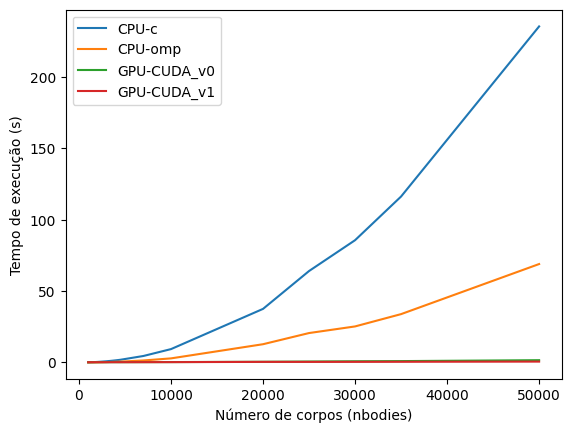

In [105]:
import os
import matplotlib.pyplot as plt
import pandas as pd
def plota_grafico(FNAME):
    df = pd.read_csv(FNAME)

    # Agrupar os dados por plataforma de execução
    grouped_data = df.groupby("platform")
    # cálculo das médias e desvios padrão para cada grupo
    # Plotar os pontos para cada plataforma
    fig, ax = plt.subplots()
    
    n = df["nbodies"].unique()
    p = df["platform"].unique()
    
    for platform, group in grouped_data:
        # colunas "nbodies" e "execution_time_s"
        data = group[["nbodies", "execution_time_s"]]
        # Agrupar os dados
        stats = data.groupby("nbodies").agg(["mean", "std"])
        nbodies = stats.index
        means = stats[("execution_time_s", "mean")]
        stds = stats[("execution_time_s", "std")]
        # Plotar a linha com os desvios padrão
        # ax.errorbar(nbodies, means, yerr=stds, label=platform)
        ax.errorbar(nbodies, means, label=platform)
    
    # Configura o gráfico
    ax.set_ylabel("Tempo de execução (s)")
    ax.set_xlabel("Número de corpos (nbodies)")
    ax.legend()
    plt.show()
    


plota_grafico("TimeExec.csv")